
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [ ]:
X = ha.drop(columns=['cp'])
y = ha['cp'].astype(int)

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "drop"
)

In [ ]:
knn = Pipeline([
    ("preprocessing", ct),
    ("kNN_classifier", KNeighborsClassifier(n_neighbors=7))]
)

knn.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7991a0a18a10>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7991a0391f70>)])),
                ('kNN_classifier', KNeighborsClassifier(n_neighbors=7))])

In [ ]:
dt = Pipeline([
    ("preprocessing", ct),
    ("dt_classifier", DecisionTreeClassifier(random_state=100, max_depth=5))]
)

dt.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7991a0a18a10>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7991a0391f70>)])),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=100))])

In [ ]:
lda = Pipeline([
    ("preprocessing", ct),
    ("lda", LinearDiscriminantAnalysis())
])

lda.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7991a0a18a10>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7991a0391f70>)])),
                ('lda', LinearDiscriminantAnalysis())])

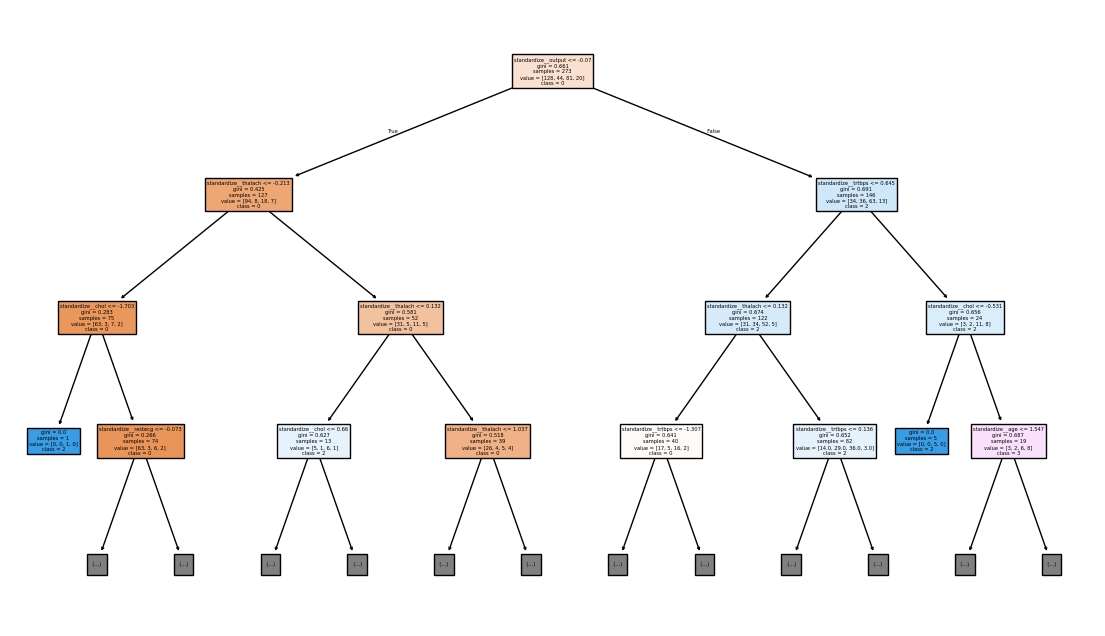

In [ ]:
tree = dt.named_steps['dt_classifier']
feat_names = dt.named_steps['preprocessing'].get_feature_names_out()
class_names = [str(c) for c in np.unique(y)]

plt.figure(figsize=(14, 8))
plot_tree(tree, feature_names=feat_names, class_names=class_names, filled=True, max_depth=3)
plt.show()

In [ ]:
t = tree.tree_
def node_desc(node_idx):
    feat_idx = t.feature[node_idx]
    thresh = t.threshold[node_idx]
    if feat_idx == -1:
        return "Leaf"
    return f"{feat_names[feat_idx]} <= {thresh:.3f}"

root = 0
left1 = t.children_left[root]
right1 = t.children_right[root]

print("Root split:", node_desc(root))
print("  Left child split:", node_desc(left1))
print("  Right child split:", node_desc(right1))

Root split: standardize__output <= -0.070
  Left child split: standardize__thalach <= -0.213
  Right child split: standardize__trtbps <= 0.645


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?